<a href="https://colab.research.google.com/github/CJSackey/DS_Assignments/blob/master/Pandas_Assignment_Data_Analysing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment

# Demographic Data Analysing

In this challenge you must analyze demographic data using Pandas. You are given a dataset of demographic data that was extracted from the 1994 Census database. Here is a sample of what the data looks like:

|    |   age | workclass        |   fnlwgt | education   |   education-num | marital-status     | occupation        | relationship   | race   | sex    |   capital-gain |   capital-loss |   hours-per-week | native-country   | salary   |
|---:|------:|:-----------------|---------:|:------------|----------------:|:-------------------|:------------------|:---------------|:-------|:-------|---------------:|---------------:|-----------------:|:-----------------|:---------|
|  0 |    39 | State-gov        |    77516 | Bachelors   |              13 | Never-married      | Adm-clerical      | Not-in-family  | White  | Male   |           2174 |              0 |               40 | United-States    | <=50K    |
|  1 |    50 | Self-emp-not-inc |    83311 | Bachelors   |              13 | Married-civ-spouse | Exec-managerial   | Husband        | White  | Male   |              0 |              0 |               13 | United-States    | <=50K    |
|  2 |    38 | Private          |   215646 | HS-grad     |               9 | Divorced           | Handlers-cleaners | Not-in-family  | White  | Male   |              0 |              0 |               40 | United-States    | <=50K    |
|  3 |    53 | Private          |   234721 | 11th        |               7 | Married-civ-spouse | Handlers-cleaners | Husband        | Black  | Male   |              0 |              0 |               40 | United-States    | <=50K    |
|  4 |    28 | Private          |   338409 | Bachelors   |              13 | Married-civ-spouse | Prof-specialty    | Wife           | Black  | Female |              0 |              0 |               40 | Cuba             | <=50K    |


You must use Pandas to answer the following questions:
* How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (`race` column)
* What is the average age of men?
* What is the percentage of people who have a Bachelor's degree?
* What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
* What percentage of people without advanced education make more than 50K?
* What is the minimum number of hours a person works per week?
* What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
* What country has the highest percentage of people that earn >50K and what is that percentage?
* Identify the most popular occupation for those who earn >50K in India. 

Use the starter code in the file `demographic_data_anaylizer`. Update the code so all variables set to "None" are set to the appropriate calculation or code. Round all decimals to the nearest tenth.

Unit tests are written for you under `test_module.py`.

### Development

For development, you can use `main.py` to test your functions. Click the "run" button and `main.py` will run.

### Testing 

We imported the tests from `test_module.py` to `main.py` for your convenience. The tests will run automatically whenever you hit the "run" button.

### Submitting

Copy your project's URL and submit it to freeCodeCamp.

### Dataset Source

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [ ]:
# Solution
import pandas as pd
import numpy as np


df = pd.read_csv('/content/drive/My Drive/adult_data.csv')
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Some Statistical Overview of our Data
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Checking to see if there are any `Null` values in our Dataset
df.isnull().sum().max()

0

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [ ]:
# 1. How many people of each race are represented in each dataset?
# This should be a Pandas series with race names as the index labels (`race` column)
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

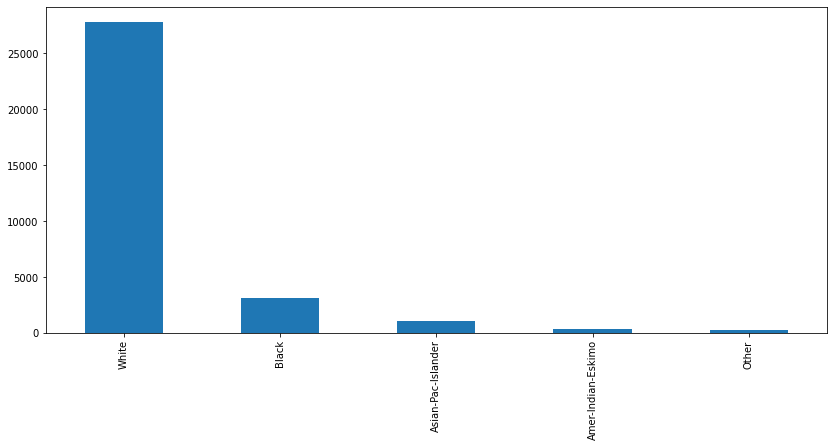

In [ ]:
df['race'].value_counts().plot(kind='bar', figsize=(14, 6))

In [ ]:
# 2. What is the average age of men (and women)?
s = round(df.groupby('sex').age.mean())
s

sex
Female    37.0
Male      39.0
Name: age, dtype: float64

In [ ]:
# Average age of men - rounded up
avg_age = round(df.loc[df['sex'] == 'Male', 'age'].mean(),1)
print('Average age of men:', avg_age, 'years.')

Average age of men: 39.4 years.


In [ ]:
# 3. What is the percentage of people who have a Bachelor's degree?
bach = round(df['education'].value_counts(normalize=True) * 100,1)
bach_per = bach['Bachelors']
print('Bachelors:', bach_per, '%')

Bachelors: 16.4 %


In [ ]:
# 4. What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

high_edu = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
low_edu = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]

# print('advanced education holders:', high_edu)
# print('non-advanced education holders:', low_edu)

# Percentage with salary of >50K
high_earn = round(len(high_edu[high_edu['salary'] == '>50K']) / len(high_edu) * 100, 1)
low_earn = round(len(low_edu[low_edu['salary'] == '>50K']) / len(low_edu) * 100, 1)

print('\n % of >50k earners with advanced education:', high_earn, '%')
print('% of >50k earners with low education:', low_earn, '%')



 % of >50k earners with advanced education: 46.5 %
% of >50k earners with low education: 17.4 %


In [ ]:
df.shape

(32561, 15)

In [ ]:
# 5. What is the minimum number of hours a person works per week?
min_hours = df['hours-per-week'].min()
min_hours


1

In [ ]:
# 6. What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

per_work = len(df[df['hours-per-week'] == min_hours])
high_sal = round(len(df[(df['hours-per-week'] == min_hours) & (df['salary'] == '>50K')]) / per_work * 100, 1)

print("% of people who work the minimum number of hours per week and have a salary of '>50K':", high_sal)

% of people who work the minimum number of hours per week and have a salary of '>50K': 10.0


In [ ]:
# 7. # What country has the highest percentage of people that earn >50K and what is the percentage?

highest_earning_country = (df.loc[df['salary'] == ">50K", 'native-country'].value_counts() / df['native-country'].value_counts()).fillna(0).sort_values(ascending=False).index[0]
highest_earning_country_percentage = round(len(df[(df['native-country'] == highest_earning_country) & (df['salary'] == '>50K')]) / len(df[df['native-country'] == highest_earning_country]) * 100, 1)

print('Country with highest % of people earning >50K:', highest_earning_country)
print('% of people that earn >50K:', highest_earning_country_percentage)


Country with highest % of people earning >50K: Iran
% of people that earn >50K: 41.9


In [ ]:
# 8. Identify the most popular occupation for those who earn >50K in India.
top_occupation = df[(df['salary'] == ">50K") & (df['native-country'] == "India")]["occupation"].value_counts().index[0]

print('Most popular occupation for those who earn >50k in India:', top_occupation)

Most popular occupation for those who earn >50k in India: Prof-specialty
